<a href="https://colab.research.google.com/github/edaaydinea/machine-learning/blob/master/Breast%20Cancer%20Classification/%20Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 08 - AIWC

# **Breast Cancer Classification using Machine Learning**

Breast cancer is the most common cancer among women worldwide, accounting for **25% of all cancer cases** and affecting **2.1 million people in 2015**. Early diagnosis significantly increases the chances of survival.

## **Challenges in Breast Cancer Detection**
The primary challenge in cancer detection is classifying tumors as **malignant** (cancerous) or **benign** (non-cancerous). Machine learning techniques can dramatically enhance diagnostic accuracy.

Research indicates that even experienced physicians achieve **79% accuracy** in cancer diagnosis. By leveraging machine learning, we can improve classification accuracy and assist doctors in making more precise decisions.

---

## **Stages of Cancer Detection**

### **First Stage: Cell Extraction**
This process involves extracting a small sample of cells from the tumor for analysis.

- **Benign tumors** – These do not spread across the body, meaning the patient is generally safe.
- **Malignant tumors** – These are cancerous and require immediate medical intervention to prevent further growth and spread.

---

## **Machine Learning for Breast Cancer Classification**

### **Objective**
Our goal is to train a machine learning model to classify breast cancer tumors as **malignant or benign** based on extracted features from medical images.

### **Process**
1. **Image Processing:** Extract images of tumors.
2. **Feature Extraction:** Identify key characteristics from the images, such as:
   - **Radius**
   - **Cell count**
   - **Texture**
   - **Perimeter**
   - **Area**
   - **Smoothness**
3. **Model Training:** Feed these extracted features into a machine learning model.
4. **Prediction:** The trained model classifies tumors as **malignant or benign** with high accuracy.

### **Conclusion**
By teaching machines to classify tumors effectively, we enhance early detection, improving patient outcomes and supporting medical professionals in making better-informed decisions.

# **Problem in Machine Learning Vocabulary**

## **Dataset Overview**
### **Input Features:** (30 Features)
- **Radius**
- **Texture**
- **Perimeter**
- **Area**
- **Smoothness**
- *(...other features included in the dataset)*

### **Target Classes:** (Binary Classification)
- **0 - Malignant (Cancerous)**
- **1 - Benign (Non-cancerous)**

### **Dataset Information**
- **Number of Instances:** 569
- **Class Distribution:**
  - **Malignant:** 212 cases
  - **Benign:** 357 cases

### **Data Sources:**
- [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))
- [Breast Cancer Detection with Reduced Feature Set](https://www.researchgate.net/publication/271907638_Breast_Cancer_Detection_with_Reduced_Feature_Set)

---

## **Binary Classification Representation**
When analyzing the **30 features**, our goal is to classify the cancer type:
- **0 → Malignant**
- **1 → Benign**

This is a **binary classification problem**, meaning the model predicts **either 0 or 1**, corresponding to malignant or benign tumors.

---

# **Support Vector Machine (SVM) Classifier**
### **Why Use SVM?**
Near the **maximum margin hyperplane**, it can be difficult to determine whether a tumor is malignant or benign. This is where **Support Vector Machines (SVMs)** are highly effective.

### **How Does SVM Work?**
- SVM finds the **optimal boundary** between classes by using **support vectors**—the most relevant data points that define the decision boundary.
- It creates a **maximum margin hyperplane** that separates malignant and benign tumors.
- **Support vectors** are the key points that lie closest to the decision boundary and influence its position.

### **Why is SVM Powerful?**
- SVM is an **extreme learning algorithm** that **focuses only on critical data points** (support vectors).
- It does not consider all data points but **only those on the boundary**, making it highly effective in classification tasks.

---

## **Conclusion**
Using **Support Vector Machines (SVMs)**, we can classify breast cancer cases more effectively by focusing on the **key features** and **critical boundary points**, leading to **higher accuracy in distinguishing malignant and benign tumors**.

### **IMPORTING DATA**

In [2]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
# %matplotlib inline

In [3]:
# Import Cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
# What dictionaries we have
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# print them one by one
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [7]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [8]:
print(cancer['target_names'])

['malignant' 'benign']


In [9]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
print(cancer['data'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [11]:
cancer['data'].shape

(569, 30)

In [12]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [13]:
df_cancer.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [14]:
df_cancer.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


### **VISUALIZING THE DATA**

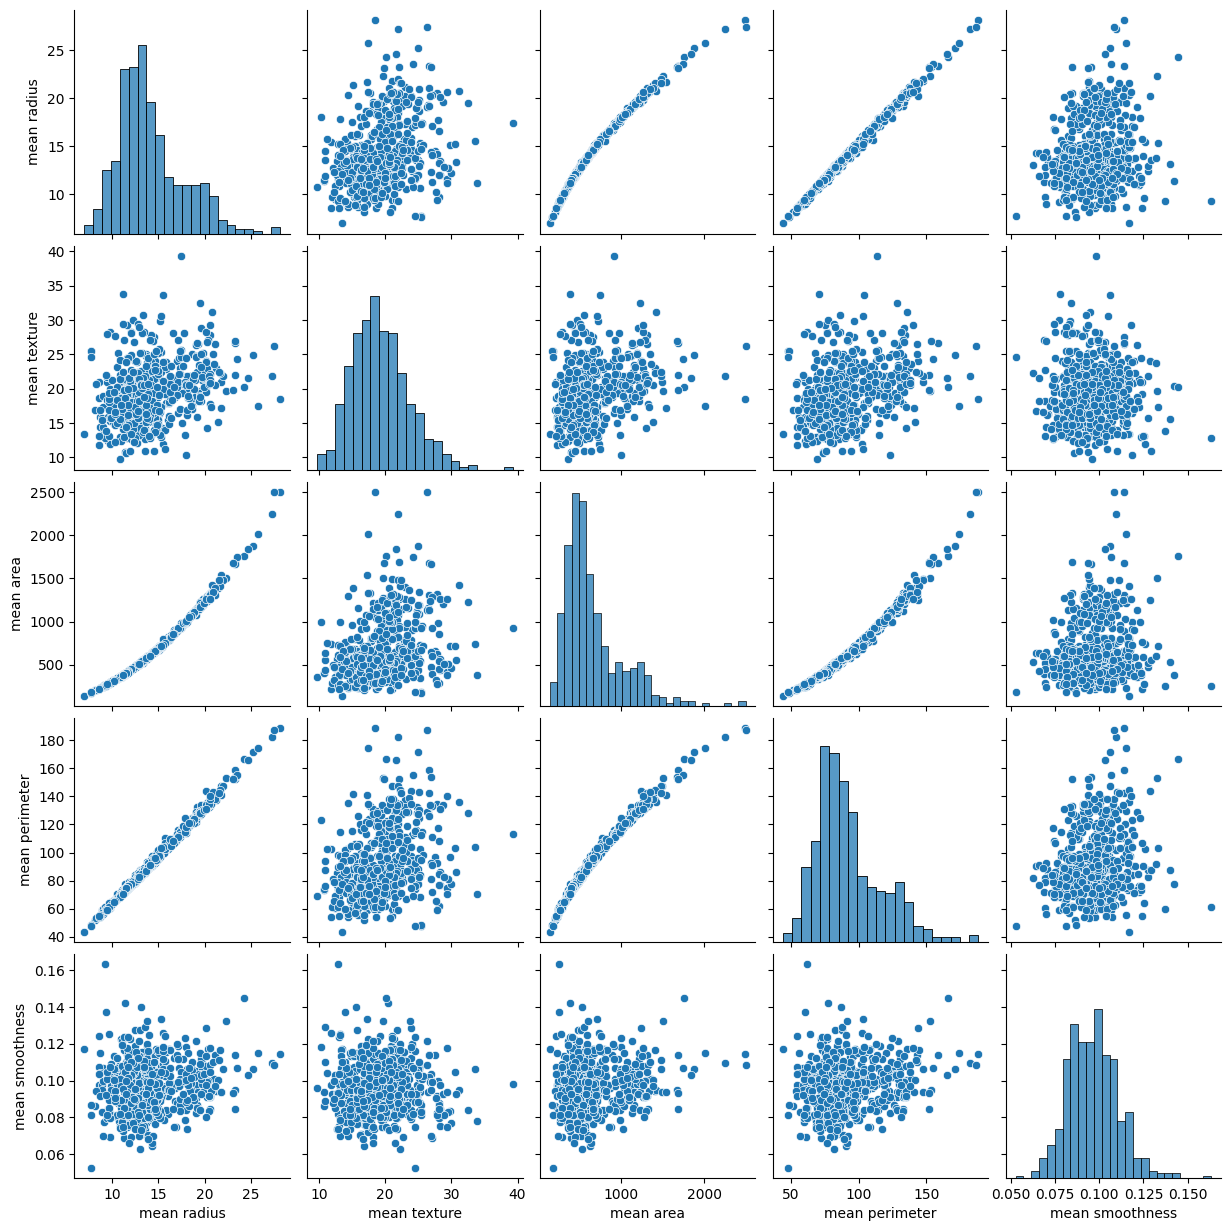

In [15]:
sns.pairplot(df_cancer,vars= ['mean radius','mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

But the only problem is that doesn't show the target class. It doesn't show actual which one of these samples is malignant or which one of them is benign.

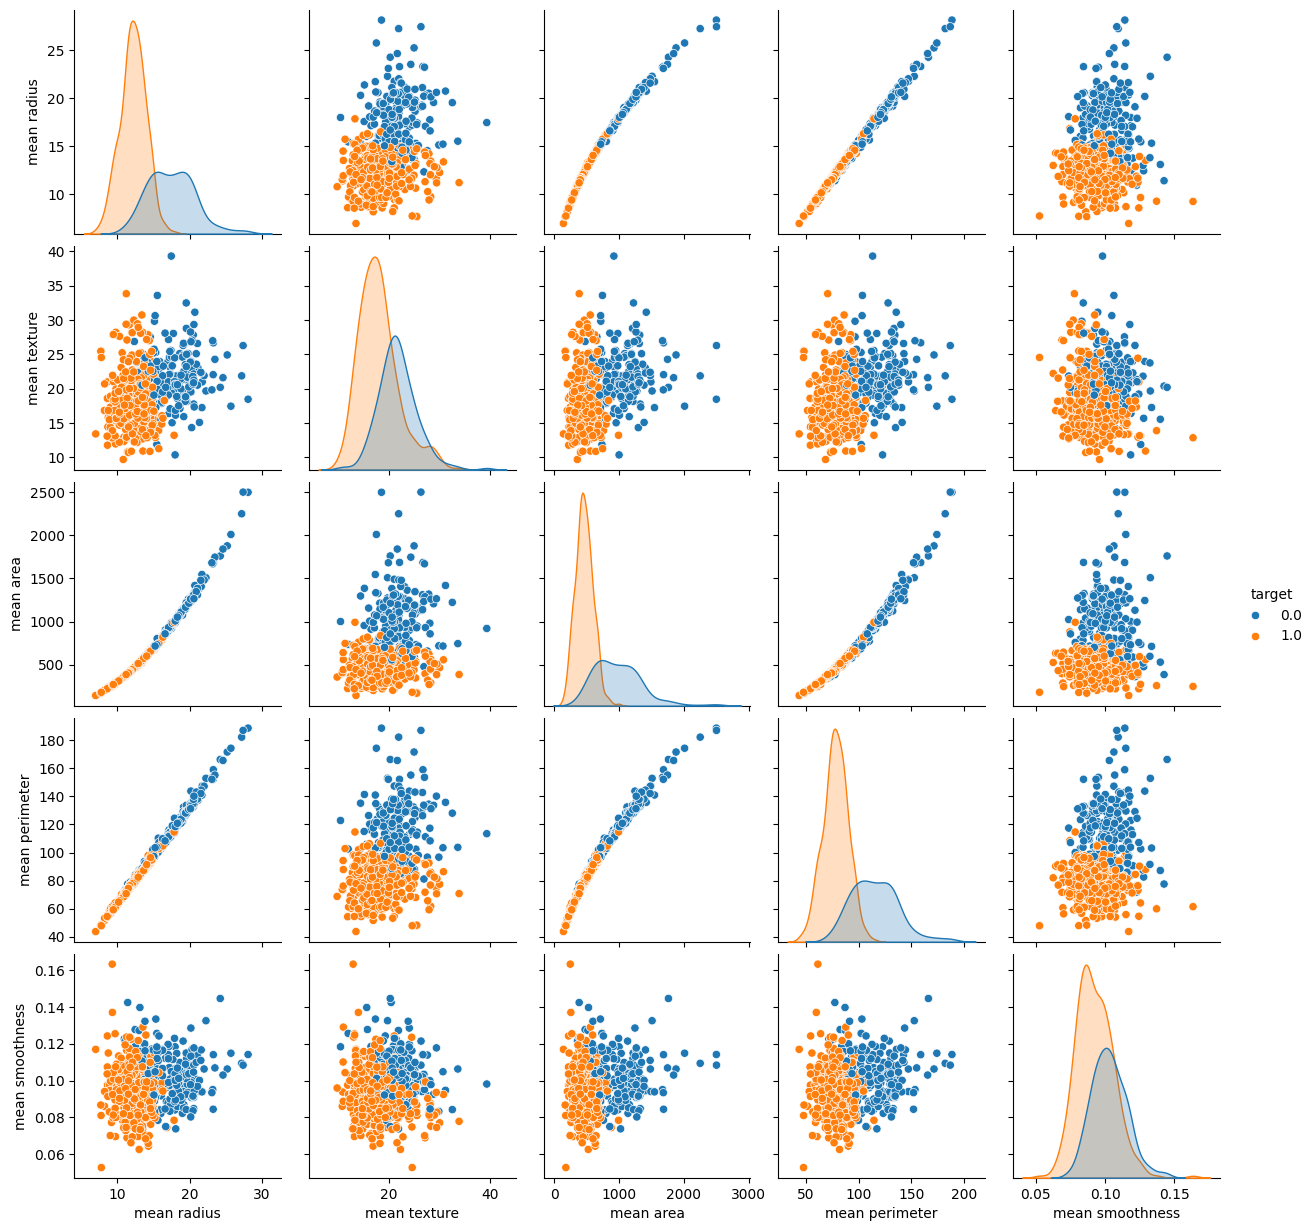

In [16]:
sns.pairplot(df_cancer,hue = 'target', vars= ['mean radius','mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

The blue points in here that's the malignant case. The orange points in here that's the benign case.

<Axes: ylabel='count'>

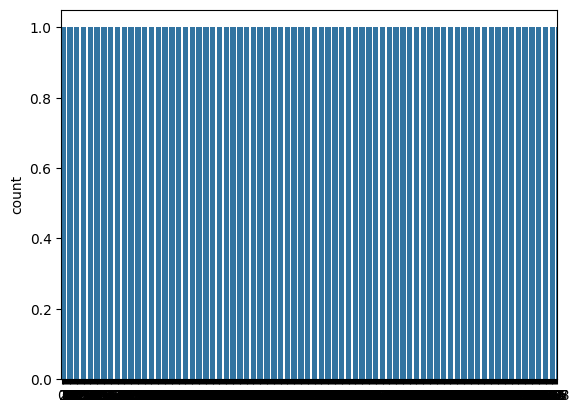

In [17]:
sns.countplot(df_cancer['target'])

We take one of these slide graphs and see how can we play.

In [ ]:
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=df_cancer)

Let's check the correlation between the variables

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(), annot=True)

### **MODEL TRAINING (FINDING A PROBLEM SOLUTION)**

In [ ]:
# Let's drop the target label coloumns
x = df_cancer.drop(['target'],axis=1)

In [ ]:
x

In [ ]:
y = df_cancer['target']
y

# **Model Training and Testing Process**

In order to build an effective breast cancer classification model, we follow a **train-test split** approach:

1. **Training Phase:**  
   - We use a **subset of the dataset** for training the machine learning model.
   - The model learns patterns and relationships between **features** and their corresponding **labels** (Malignant or Benign).

2. **Testing Phase:**  
   - After training, we evaluate the model using a **testing dataset**.
   - The testing dataset contains data that the model **has never seen before**.
   - This ensures that the model’s predictions are **generalizable** and not just memorized from the training data.

By following this approach, we can measure the model's performance and ensure it works effectively on new, unseen cases.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 5)

In [ ]:
x_train

In [ ]:
x_train.shape

In [ ]:
x_test

In [ ]:
x_test.shape

In [ ]:
y_train

In [ ]:
y_train.shape

In [ ]:
y_test

In [ ]:
y_test.shape

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
svc_model = SVC()

In [ ]:
svc_model.fit(x_train, y_train)

**EVALUATING THE MODEL**

We're talking about the testing data which has data that has never seen before. 

In [ ]:
y_predict = svc_model.predict(x_test)

In [ ]:
y_predict

We're going to plot a confusion matrix.  We need to specify compare our true value versus the predicted that.

In [ ]:
cm = confusion_matrix(y_test, y_predict)

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict))

**IMPROVING THE MODEL**

In [ ]:
min_train = x_train.min()
min_train

In [ ]:
range_train = (x_train - min_train).max()
range_train

In [ ]:
x_train_scaled = (x_train - min_train)/range_train
x_train_scaled

In [ ]:
sns.scatterplot(x = x_train['mean area'], y= x_train['mean smoothness'], hue= y_train)

In [ ]:
sns.scatterplot(x= x_train_scaled['mean area'], y= x_train_scaled['mean smoothness'], hue= y_train)

In [ ]:
min_test = x_test.min()
range_test = (x_test - min_test).max()
x_test_scaled = (x_test - min_test)/ range_test

In [ ]:
svc_model.fit(x_train_scaled, y_train)

In [ ]:
y_predict = svc_model.predict(x_test_scaled)

In [ ]:
cm = confusion_matrix(y_test, y_predict)

In [ ]:
sns.heatmap(cm, annot=True, fmt = 'd')

In [ ]:
print(classification_report(y_test, y_predict))

**IMPROVING THE MODEL - PART 2**

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit= True, verbose= 4)

In [ ]:
grid.fit(x_train_scaled, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid_prediction = grid.predict(x_test_scaled)

In [ ]:
cm = confusion_matrix(y_test, grid_prediction)

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test,grid_prediction ))

# **Conclusion**

- Machine Learning techniques, particularly **Support Vector Machines (SVM)**, successfully classified tumors as **Malignant or Benign** with **97% accuracy**.
- This approach enables the **rapid evaluation** of breast masses, allowing for **automated classification** with high precision.
- **Early breast cancer detection** can significantly improve survival rates, especially in **developing regions** where access to expert medical diagnosis is limited.
- The technique can be further enhanced by integrating **Computer Vision** and **Machine Learning** to directly classify cancer using **tissue images**, leading to even more accurate and automated detection methods.